In [55]:
import pandas as pd

In [56]:
df = pd.read_csv("00_국가별_데이터_전처리_세계_추가_수정.csv")

In [57]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

from math import sqrt
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

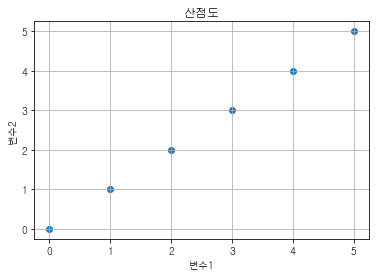

In [58]:
# 필요한 라이브러리 불러오기

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.font_manager as fm

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
 
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('변수1')
plt.ylabel('변수2')
plt.grid(True)
plt.show()

font_location = fm.findfont('NanumGothic')
font_name = fm.FontProperties(fname=font_location).get_name()

### 선형회귀와 비선형회귀 검증
#### 선형회귀
- LinearSVR
- 릿지
- 라쏘
- 엘라스틱넷
---------------------------------
#### 비선형회귀
- 결정 트리
- 랜덤포레스트
- Xgboost
- LightGBM
- 

In [59]:
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [60]:
df.columns

Index(['COUNTRY', 'Year', 'Biomass and waste (billion kWh)',
       'CO2 emissions (MMtonnes CO2)', 'Coal (quad Btu)',
       'Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)',
       'Consumption (quad Btu)', 'Fossil fuels (billion kWh)', 'GDP',
       'Generation (billion kWh)', 'Geothermal (billion kWh)',
       'Hydroelectric pumped storage (billion kWh)',
       'Hydroelectricity (billion kWh)', 'Natural gas (quad Btu)',
       'Non-hydroelectric renewables (billion kWh)', 'Nuclear (billion kWh)',
       'Nuclear (quad Btu)', 'Nuclear, renewables, and other (quad Btu)',
       'Petroleum and other liquids (MMtonnes CO2)',
       'Petroleum and other liquids (quad Btu)', 'Population',
       'Renewables (billion kWh)', 'Renewables and other (quad Btu)',
       'Solar (billion kWh)', 'Solar, tide, wave, fuel cell (billion kWh)',
       'Tide and wave (billion kWh)', 'Wind (billion kWh)',
       'electricity net consumption (billion kWh)'],
      dtype='object')

### world 제거

In [61]:
df.shape

(9744, 29)

In [62]:
df = df[df['COUNTRY'] != 'World']
#df = df[df['Generation (billion kWh)'] != 0]

In [63]:
df.shape

(9702, 29)

### 테스트 데이터 분리

In [64]:
df.columns

Index(['COUNTRY', 'Year', 'Biomass and waste (billion kWh)',
       'CO2 emissions (MMtonnes CO2)', 'Coal (quad Btu)',
       'Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)',
       'Consumption (quad Btu)', 'Fossil fuels (billion kWh)', 'GDP',
       'Generation (billion kWh)', 'Geothermal (billion kWh)',
       'Hydroelectric pumped storage (billion kWh)',
       'Hydroelectricity (billion kWh)', 'Natural gas (quad Btu)',
       'Non-hydroelectric renewables (billion kWh)', 'Nuclear (billion kWh)',
       'Nuclear (quad Btu)', 'Nuclear, renewables, and other (quad Btu)',
       'Petroleum and other liquids (MMtonnes CO2)',
       'Petroleum and other liquids (quad Btu)', 'Population',
       'Renewables (billion kWh)', 'Renewables and other (quad Btu)',
       'Solar (billion kWh)', 'Solar, tide, wave, fuel cell (billion kWh)',
       'Tide and wave (billion kWh)', 'Wind (billion kWh)',
       'electricity net consumption (billion kWh)'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9702 entries, 0 to 9743
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   COUNTRY                                     9702 non-null   object 
 1   Year                                        9702 non-null   int64  
 2   Biomass and waste (billion kWh)             9702 non-null   float64
 3   CO2 emissions (MMtonnes CO2)                9702 non-null   float64
 4   Coal (quad Btu)                             9702 non-null   float64
 5   Coal and coke (MMtonnes CO2)                9702 non-null   float64
 6   Consumed natural gas (MMtonnes CO2)         9702 non-null   float64
 7   Consumption (quad Btu)                      9702 non-null   float64
 8   Fossil fuels (billion kWh)                  9702 non-null   float64
 9   GDP                                         9702 non-null   float64
 10  Generation (

'Hydroelectricity (billion kWh)', 'Non-hydroelectric renewables (billion kWh)', 'Geothermal (billion kWh)', 'Solar, tide, wave, fuel cell (billion kWh)', 'Tide and wave (billion kWh)', 'Solar (billion kWh)', 'Wind (billion kWh)', 'Biomass and waste (billion kWh)'

In [66]:
#X = df.drop(['GDP', 'Year', 'COUNTRY','CO2 emissions (MMtonnes CO2)', 'Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)','CO2 emissions (MMtonnes CO2)','Generation (billion kWh)','Consumption (quad Btu)','Non-hydroelectric renewables (billion kWh)','Solar, tide, wave, fuel cell (billion kWh)','Nuclear, renewables, and other (quad Btu)','Petroleum and other liquids (MMtonnes CO2)','Renewables (billion kWh)'], axis=1)
# ['GDP', 'Year', 'COUNTRY','CO2 emissions (MMtonnes CO2)', 'Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)','CO2 emissions (MMtonnes CO2)','Generation (billion kWh)','Consumption (quad Btu)','Non-hydroelectric renewables (billion kWh)','Solar, tide, wave, fuel cell (billion kWh)','Nuclear, renewables, and other (quad Btu)','Petroleum and other liquids (MMtonnes CO2)','Renewables (billion kWh)']
from sklearn.preprocessing import StandardScaler
# X = df.drop(['Year', 'COUNTRY', 'CO2 emissions (MMtonnes CO2)', 'GDP','Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)', 'Petroleum and other liquids (MMtonnes CO2)', 'Generation (billion kWh)','Non-hydroelectric renewables (billion kWh)','Solar, tide, wave, fuel cell (billion kWh)','Nuclear, renewables, and other (quad Btu)', 'Renewables (billion kWh)'], axis=1)
X = df.drop(['Year', 'COUNTRY', 'Consumption (quad Btu)', 'CO2 emissions (MMtonnes CO2)', 'GDP','Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)', 'Petroleum and other liquids (MMtonnes CO2)', 'Generation (billion kWh)','Non-hydroelectric renewables (billion kWh)','Solar, tide, wave, fuel cell (billion kWh)','Nuclear, renewables, and other (quad Btu)', 'Hydroelectricity (billion kWh)', 'Non-hydroelectric renewables (billion kWh)', 'Geothermal (billion kWh)', 'Solar, tide, wave, fuel cell (billion kWh)', 'Tide and wave (billion kWh)', 'Solar (billion kWh)', 'Wind (billion kWh)', 'Biomass and waste (billion kWh)', 'Hydroelectric pumped storage (billion kWh)'], axis=1)
#X = df.drop(['Year', 'COUNTRY', 'CO2 emissions (MMtonnes CO2)', 'GDP','Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)', 'Petroleum and other liquids (MMtonnes CO2)', 'Generation (billion kWh)','Non-hydroelectric renewables (billion kWh)','Solar, tide, wave, fuel cell (billion kWh)','Nuclear, renewables, and other (quad Btu)', 'Hydroelectricity (billion kWh)', 'Non-hydroelectric renewables (billion kWh)', 'Geothermal (billion kWh)', 'Solar, tide, wave, fuel cell (billion kWh)', 'Tide and wave (billion kWh)', 'Solar (billion kWh)', 'Wind (billion kWh)', 'Biomass and waste (billion kWh)'], axis=1)
#X = df.drop(['Year', 'COUNTRY', 'CO2 emissions (MMtonnes CO2)', 'GDP','Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)', 'Petroleum and other liquids (MMtonnes CO2)', 'Generation (billion kWh)','Non-hydroelectric renewables (billion kWh)','Solar, tide, wave, fuel cell (billion kWh)','Nuclear, renewables, and other (quad Btu)', 'Renewables (billion kWh)'], axis=1)
#X = df.drop(['Year', 'COUNTRY', 'CO2 emissions (MMtonnes CO2)', 'GDP','Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)', 'Petroleum and other liquids (MMtonnes CO2)'], axis=1)
y = df['CO2 emissions (MMtonnes CO2)']
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, shuffle = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1004, shuffle = False)
# 데이터 스케일링
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()


In [67]:
X

,Coal (quad Btu),Fossil fuels (billion kWh),Natural gas (quad Btu),Nuclear (billion kWh),Nuclear (quad Btu),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),electricity net consumption (billion kWh)
0,0.002479,0.231000,0.002094,0.0,0.0,0.014624,13356.50,0.711000,0.007386,0.876060
1,0.002604,0.271000,0.003141,0.0,0.0,0.016668,13171.68,0.721000,0.007537,0.922560
2,0.003021,0.245000,0.005235,0.0,0.0,0.016251,12882.52,0.707000,0.007391,0.885360
3,0.003021,0.254000,0.005235,0.0,0.0,0.022918,12537.73,0.746000,0.007848,0.930000
4,0.003083,0.262000,0.005235,0.0,0.0,0.022981,12204.31,0.757000,0.007903,0.947670
...,...,...,...,...,...,...,...,...,...,...
9739,0.060448,3.218560,0.000000,0.0,0.0,0.049911,14751.10,4.130900,0.044062,7.838552
9740,0.065284,3.932020,0.000000,0.0,0.0,0.061759,15052.18,5.254980,0.049737,8.455186
9741,0.061204,3.850240,0.000000,0.0,0.0,0.055498,15354.61,4.380599,0.040666,7.786427
9742,0.052825,3.655663,0.000000,0.0,0.0,0.052992,15669.67,3.938347,0.037482,8.131027


In [68]:
# 코드 10-2
# 스탯츠모델스, 사이킷런 ==========
from statsmodels.formula.api import ols 
from sklearn.linear_model import LinearRegression

# 선형 회귀모형 형태(종속변수 ~ 독립변수1 + 독립변수2 + 독립변수3 + ···)
# 단순 선형 회귀분석 ==========

fit = ols('y~X', data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.825e+06
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:57:03   Log-Likelihood:                -35510.
No. Observations:                9702   AIC:                         7.104e+04
Df Residuals:                    9691   BIC:                         7.112e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4355      0.103      4.239      0.0

여기서 'y~X'는 종속 변수 y와 독립 변수 X의 관계를 나타내며, data=df는 해당 데이터프레임을 나타냅니다. fit() 메서드를 사용하여 모델을 학습시킨 후, summary() 메서드를 통해 회귀 분석의 결과를 요약하여 출력합니다.

statsmodels를 사용한 선형 회귀 분석에서 fit.summary()는 회귀 분석 결과의 상세한 통계적 정보를 제공합니다. 이를 통해 모델의 유효성, 각 변수의 유의성, 계수 등에 대한 정보를 확인할 수 있습니다.

In [69]:
df.describe()

,Year,Biomass and waste (billion kWh),CO2 emissions (MMtonnes CO2),Coal (quad Btu),Coal and coke (MMtonnes CO2),Consumed natural gas (MMtonnes CO2),Consumption (quad Btu),Fossil fuels (billion kWh),GDP,Generation (billion kWh),...,Petroleum and other liquids (MMtonnes CO2),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),Solar (billion kWh),"Solar, tide, wave, fuel cell (billion kWh)",Tide and wave (billion kWh),Wind (billion kWh),electricity net consumption (billion kWh)
count,9702.000000,9702.000000,9702.000000,9702.000000,9.702000e+03,9702.000000,9702.000000,9702.000000,9702.000000,9702.000000,...,9702.000000,9702.000000,9.702000e+03,9702.000000,9702.000000,9702.000000,9702.000000,9702.000000,9702.000000,9702.000000
mean,2000.500000,1.034741,116.482601,0.526963,5.011491e+01,22.160279,1.895257,45.354236,309.519934,69.988618,...,44.207411,0.689987,2.624436e+04,15.302225,0.161862,0.497256,0.500555,0.003299,1.330227,63.581782
std,12.121543,5.999813,590.933111,4.070981,3.858344e+02,106.255841,8.932775,245.486244,1308.267174,350.401505,...,181.013426,2.853854,1.130948e+05,75.328846,0.806516,6.725475,6.726947,0.039312,14.552068,328.685800
min,1980.000000,0.000000,0.000000,0.000000,-5.130222e-03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,-0.168214,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1990.000000,0.000000,0.435668,0.000000,0.000000e+00,0.000000,0.007458,0.058000,0.000000,0.159147,...,0.400000,0.006258,1.562968e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162812
50%,2000.500000,0.000000,4.015588,0.000000,7.755000e-07,0.000000,0.086403,0.832500,16.142440,2.319420,...,2.987016,0.042138,3.815061e+03,0.325000,0.004235,0.000000,0.000000,0.000000,0.000000,2.289980
75%,2011.000000,0.045000,41.661156,0.029017,3.057892e+00,6.162818,0.751516,13.842905,136.551975,24.869285,...,22.537498,0.336848,1.523736e+04,5.131250,0.052944,0.001000,0.001000,0.000000,0.000100,21.441000
max,2021.000000,136.433800,11420.234210,96.197752,9.114390e+03,1684.623741,165.158414,5391.953773,25638.030000,8151.518231,...,2644.414302,40.572561,1.427055e+06,2363.284458,20.535439,340.862000,340.874000,0.727000,611.220658,7805.656341


In [70]:
df

,COUNTRY,Year,Biomass and waste (billion kWh),CO2 emissions (MMtonnes CO2),Coal (quad Btu),Coal and coke (MMtonnes CO2),Consumed natural gas (MMtonnes CO2),Consumption (quad Btu),Fossil fuels (billion kWh),GDP,...,Petroleum and other liquids (MMtonnes CO2),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),Solar (billion kWh),"Solar, tide, wave, fuel cell (billion kWh)",Tide and wave (billion kWh),Wind (billion kWh),electricity net consumption (billion kWh)
0,Afghanistan,1980,0.000000,1.325965,0.002479,0.231314,0.111101,0.026583,0.231000,0.00000,...,0.983550,0.014624,13356.50,0.711000,0.007386,0.00000,0.00000,0.0,0.0,0.876060
1,Afghanistan,1981,0.000000,1.509628,0.002604,0.242977,0.166651,0.029949,0.271000,0.00000,...,1.100000,0.016668,13171.68,0.721000,0.007537,0.00000,0.00000,0.0,0.0,0.922560
2,Afghanistan,1982,0.000000,1.659605,0.003021,0.281853,0.277752,0.031898,0.245000,0.00000,...,1.100000,0.016251,12882.52,0.707000,0.007391,0.00000,0.00000,0.0,0.0,0.885360
3,Afghanistan,1983,0.000000,2.059605,0.003021,0.281853,0.277752,0.039022,0.254000,0.00000,...,1.500000,0.022918,12537.73,0.746000,0.007848,0.00000,0.00000,0.0,0.0,0.930000
4,Afghanistan,1984,0.000000,2.065436,0.003083,0.287684,0.277752,0.039202,0.262000,0.00000,...,1.500000,0.022981,12204.31,0.757000,0.007903,0.00000,0.00000,0.0,0.0,0.947670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,Zimbabwe,2017,0.151000,8.992426,0.060448,5.461868,0.000000,0.154422,3.218560,39.06286,...,3.530558,0.049911,14751.10,4.130900,0.044062,0.01100,0.01100,0.0,0.0,7.838552
9740,Zimbabwe,2018,0.187000,10.290169,0.065284,5.912279,0.000000,0.176781,3.932020,40.89881,...,4.377890,0.061759,15052.18,5.254980,0.049737,0.01900,0.01900,0.0,0.0,8.455186
9741,Zimbabwe,2019,0.189000,9.408047,0.061204,5.468512,0.000000,0.157368,3.850240,38.40398,...,3.939535,0.055498,15354.61,4.380599,0.040666,0.02600,0.02600,0.0,0.0,7.786427
9742,Zimbabwe,2020,0.099000,8.253322,0.052825,4.491685,0.000000,0.143299,3.655663,35.34675,...,3.761637,0.052992,15669.67,3.938347,0.037482,0.03400,0.03400,0.0,0.0,8.131027


### 1. LinearSVR 모델 학습

In [71]:
# from sklearn.model_selection import GridSearchCV

# # 하이퍼파라미터의 범위 설정
# param_grid = {
#     'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
# }

# # GridSearchCV 객체 생성
# grid_search = GridSearchCV(
#     Lasso(), 
#     param_grid, 
#     cv=5, 
#     scoring='neg_mean_squared_error'
# )

# # 최적의 하이퍼파라미터 찾기
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print('Best parameters: ', grid_search.best_params_)

# # 최적의 모델 생성
# model = grid_search.best_estimator_


### 1. LinearSVR 모델 검증

C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.0001
Train MAE: 2.80
Train RMSE: 10.78
Test MAE: 4.61
Test RMSE: 13.48 

0.9995758978732957


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.001
Train MAE: 2.29
Train RMSE: 8.06
Test MAE: 5.23
Test RMSE: 21.37 

0.998933748711371


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.01
Train MAE: 2.29
Train RMSE: 8.48
Test MAE: 6.34
Test RMSE: 26.57 

0.9983523995401248


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.05
Train MAE: 8.22
Train RMSE: 13.18
Test MAE: 14.12
Test RMSE: 45.06 

0.995259925760694


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.1
Train MAE: 30.37
Train RMSE: 31.49
Test MAE: 36.19
Test RMSE: 59.77 

0.9916625376355725
0.5
Train MAE: 14.27
Train RMSE: 39.40
Test MAE: 13.56
Test RMSE: 28.62 

0.9980882972117084
2
Train MAE: 26.62
Train RMSE: 91.53
Test MAE: 24.99
Test RMSE: 66.55 

0.9896626063741413
5
Train MAE: 33.57
Train RMSE: 141.83
Test MAE: 31.51
Test RMSE: 90.78 

0.9807652479398399
10
Train MAE: 68.62
Train RMSE: 271.46
Test MAE: 82.68
Test RMSE: 251.02 

0.8529229456796518
100
Train MAE: 152.17
Train RMSE: 560.53
Test MAE: 193.51
Test RMSE: 657.08 

-0.0077916226588770066


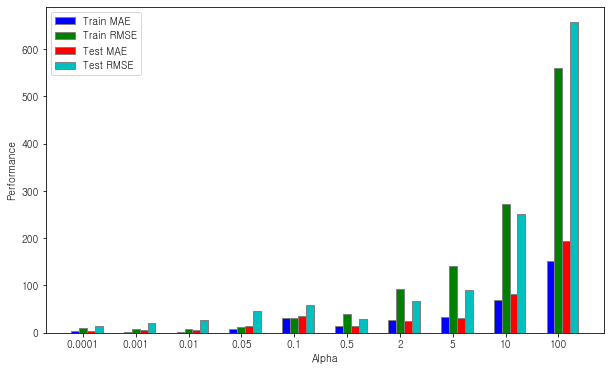

In [72]:
# 성능 지표를 저장할 리스트를 생성합니다.
train_maes = []
train_rmses = []
test_maes = []
test_rmses = []

alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 2, 5, 10, 100]
for alpha in alphas:
    model = LinearSVR(epsilon=alpha, random_state=1) # random_state=1
    model.fit(X_train, y_train)

    # 훈련 데이터에 대한 성능 확인
    train_pred = model.predict(X_train)
    train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()
    y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()
    train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
    train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))

    # 테스트 데이터에 대한 성능 확인
    pred = model.predict(X_test)
    pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()
    y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
    test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
    test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

    # 성능 지표를 리스트에 추가합니다.
    train_maes.append(train_mae)
    train_rmses.append(train_rmse)
    test_maes.append(test_mae)
    test_rmses.append(test_rmse)
    print(alpha)
    print("Train MAE: {:.2f}".format(train_mae))
    print("Train RMSE: {:.2f}".format(train_rmse))
    print("Test MAE: {:.2f}".format(test_mae))
    print("Test RMSE: {:.2f}".format(test_rmse), '\n')

    print(r2_score(y_test, pred))

# 성능 지표를 그래프로 시각화합니다.
barWidth = 0.15  # 막대 그래프의 너비를 설정합니다.
r1 = np.arange(len(alphas))  # 막대 그래프의 x 좌표를 설정합니다.
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(10, 6))
plt.bar(r1, train_maes, color='b', width=barWidth, edgecolor='grey', label='Train MAE')
plt.bar(r2, train_rmses, color='g', width=barWidth, edgecolor='grey', label='Train RMSE')
plt.bar(r3, test_maes, color='r', width=barWidth, edgecolor='grey', label='Test MAE')
plt.bar(r4, test_rmses, color='c', width=barWidth, edgecolor='grey', label='Test RMSE')

# Add xticks on the middle of the group bars
plt.xlabel('Alpha', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_maes))], alphas)

plt.ylabel('Performance')
plt.legend()
plt.show()


In [73]:
# 최적의 모델 생성
model = LinearSVR(epsilon=0.001) # random_state=1
model.fit(X_train, y_train)

C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(epsilon=0.001)

In [74]:
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 

# 스케일링된 예측값을 역변환
pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()

# 훈련 데이터에 대한 성능 확인
train_pred = model.predict(X_train)

# 스케일링된 훈련 예측값을 역변환
train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()

# 스케일링된 훈련 타겟값을 역변환
y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()

# 역변환된 값으로 성능 지표 계산
train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))
# print(alpha)
print("Train MAE: {:.2f}".format(train_mae))
print("Train RMSE: {:.2f}".format(train_rmse))

# 스케일링된 타겟값을 역변환
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# 역변환된 값으로 성능 지표 계산
test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

print("Test MAE: {:.2f}".format(test_mae))
print("Test RMSE: {:.2f}".format(test_rmse), '\n')

r2_score(y_test, pred)

Train MAE: 2.30
Train RMSE: 8.48
Test MAE: 5.27
Test RMSE: 21.54 



0.9989168865505526

### 1. LinearSVR 중요변수 확인

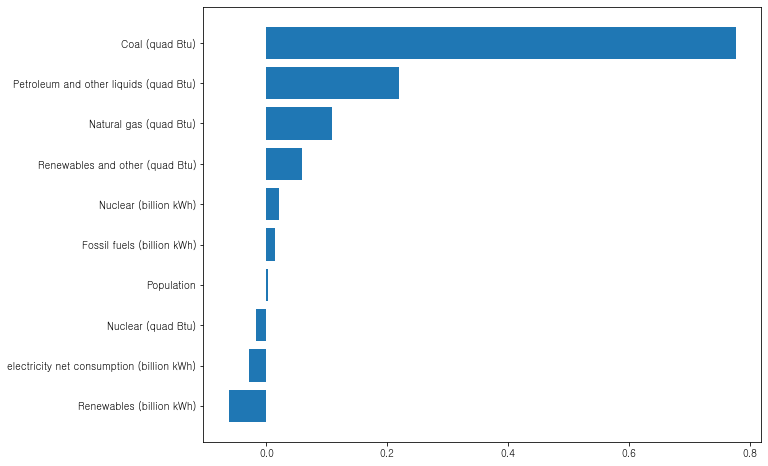

In [75]:
# Feature importance, feature 선언
importances = model.coef_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

### 2. 릿지 회귀 학습

In [76]:
# from sklearn.model_selection import GridSearchCV

# # 하이퍼파라미터 그리드 생성
# param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# # 모델 초기화
# model = Ridge()

# # GridSearchCV 객체 생성
# grid_search = GridSearchCV(model, param_grid, cv=5)

# # 최적의 하이퍼파라미터 찾기
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print('Best parameters: ', grid_search.best_params_)

# # 최적의 모델 생성
# model = grid_search.best_estimator_


### 2. 릿지 회귀 모델 검증

5
Train MAE: 2.36
Train RMSE: 7.38
Test MAE: 6.75
Test RMSE: 28.98 

0.9980391337530516
6
Train MAE: 2.38
Train RMSE: 7.45
Test MAE: 6.65
Test RMSE: 28.28 

0.9981327998594721
7
Train MAE: 2.41
Train RMSE: 7.52
Test MAE: 6.57
Test RMSE: 27.71 

0.9982076417483084
8
Train MAE: 2.43
Train RMSE: 7.61
Test MAE: 6.50
Test RMSE: 27.24 

0.9982677716386312
9
Train MAE: 2.45
Train RMSE: 7.70
Test MAE: 6.44
Test RMSE: 26.86 

0.9983162017267965
10
Train MAE: 2.48
Train RMSE: 7.80
Test MAE: 6.39
Test RMSE: 26.55 

0.9983551856171179


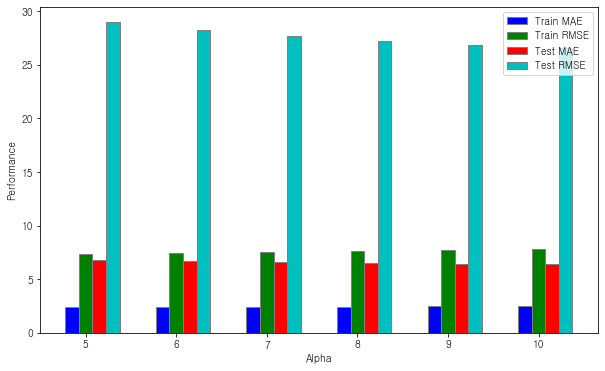

In [77]:
# 성능 지표를 저장할 리스트를 생성합니다.
train_maes = []
train_rmses = []
test_maes = []
test_rmses = []

alphas = [5,6,7,8,9,10]
for alpha in alphas:
    model = Ridge(alpha=alpha) # random_state=1
    model.fit(X_train, y_train)

    # 훈련 데이터에 대한 성능 확인
    train_pred = model.predict(X_train)
    train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()
    y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()
    train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
    train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))

    # 테스트 데이터에 대한 성능 확인
    pred = model.predict(X_test)
    pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()
    y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
    test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
    test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

    # 성능 지표를 리스트에 추가합니다.
    train_maes.append(train_mae)
    train_rmses.append(train_rmse)
    test_maes.append(test_mae)
    test_rmses.append(test_rmse)
    print(alpha)
    print("Train MAE: {:.2f}".format(train_mae))
    print("Train RMSE: {:.2f}".format(train_rmse))
    print("Test MAE: {:.2f}".format(test_mae))
    print("Test RMSE: {:.2f}".format(test_rmse), '\n')

    print(r2_score(y_test, pred))

# 성능 지표를 그래프로 시각화합니다.
barWidth = 0.15  # 막대 그래프의 너비를 설정합니다.
r1 = np.arange(len(alphas))  # 막대 그래프의 x 좌표를 설정합니다.
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(10, 6))
plt.bar(r1, train_maes, color='b', width=barWidth, edgecolor='grey', label='Train MAE')
plt.bar(r2, train_rmses, color='g', width=barWidth, edgecolor='grey', label='Train RMSE')
plt.bar(r3, test_maes, color='r', width=barWidth, edgecolor='grey', label='Test MAE')
plt.bar(r4, test_rmses, color='c', width=barWidth, edgecolor='grey', label='Test RMSE')

# Add xticks on the middle of the group bars
plt.xlabel('Alpha', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_maes))], alphas)

plt.ylabel('Performance')
plt.legend()
plt.show()


In [78]:
model = Ridge(alpha=10) # random_state=1
model.fit(X_train, y_train)

Ridge(alpha=10)

In [79]:
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 

# 스케일링된 예측값을 역변환
pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()

# 훈련 데이터에 대한 성능 확인
train_pred = model.predict(X_train)

# 스케일링된 훈련 예측값을 역변환
train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()

# 스케일링된 훈련 타겟값을 역변환
y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()

# 역변환된 값으로 성능 지표 계산
train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))

print("Train MAE: {:.2f}".format(train_mae))
print("Train RMSE: {:.2f}".format(train_rmse))

# 스케일링된 타겟값을 역변환
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# 역변환된 값으로 성능 지표 계산
test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

r2_score(y_test, pred)

Train MAE: 2.48
Train RMSE: 7.80


0.9983551856171179

### 2. 릿지회귀 중요변수 확인

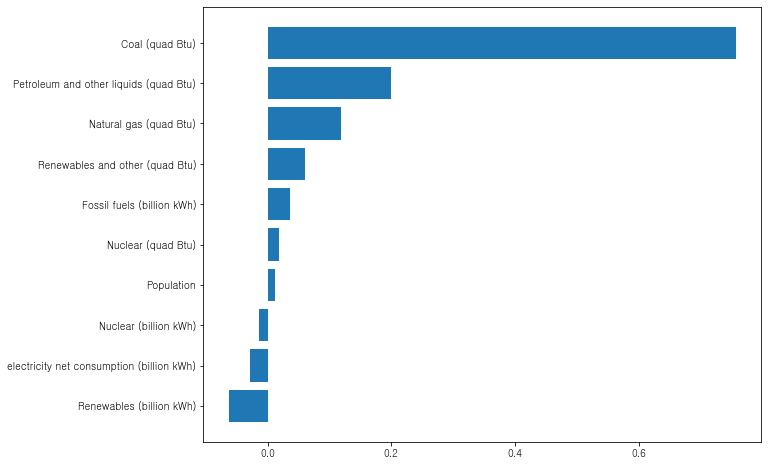

In [80]:
# Feature coefficients, feature 선언
coefficients = model.coef_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

### 3. 라쏘 회귀 모델 학습

In [81]:
# # 하이퍼파라미터의 범위 설정
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
# }

# # GridSearchCV 객체 생성
# grid_search = GridSearchCV(
#     Lasso(), 
#     param_grid, 
#     cv=5, 
#     scoring='neg_mean_squared_error'
# )

# # 최적의 하이퍼파라미터 찾기
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print('Best parameters: ', grid_search.best_params_)

# # 최적의 모델 생성
# model = grid_search.best_estimator_

### 3. 라쏘 회귀 모델 검증

0.0001
Train MAE: 2.30
Train RMSE: 7.54
Test MAE: 5.19
Test RMSE: 18.90 

0.9991658521398958
0.001
Train MAE: 2.60
Train RMSE: 8.45
Test MAE: 4.74
Test RMSE: 15.04 

0.9994723258570521
0.01
Train MAE: 3.60
Train RMSE: 11.66
Test MAE: 5.25
Test RMSE: 15.61 

0.9994312406942039
0.05
Train MAE: 10.85
Train RMSE: 36.05
Test MAE: 16.88
Test RMSE: 52.68 

0.993522463551489
0.1
Train MAE: 20.70
Train RMSE: 69.98
Test MAE: 32.64
Test RMSE: 106.06 

0.9737442053485176
0.5
Train MAE: 89.75
Train RMSE: 296.84
Test MAE: 113.05
Test RMSE: 376.71 

0.668762709714805
2
Train MAE: 152.17
Train RMSE: 560.53
Test MAE: 193.51
Test RMSE: 657.08 

-0.0077916226588770066
5
Train MAE: 152.17
Train RMSE: 560.53
Test MAE: 193.51
Test RMSE: 657.08 

-0.0077916226588770066
10
Train MAE: 152.17
Train RMSE: 560.53
Test MAE: 193.51
Test RMSE: 657.08 

-0.0077916226588770066
100
Train MAE: 152.17
Train RMSE: 560.53
Test MAE: 193.51
Test RMSE: 657.08 

-0.0077916226588770066


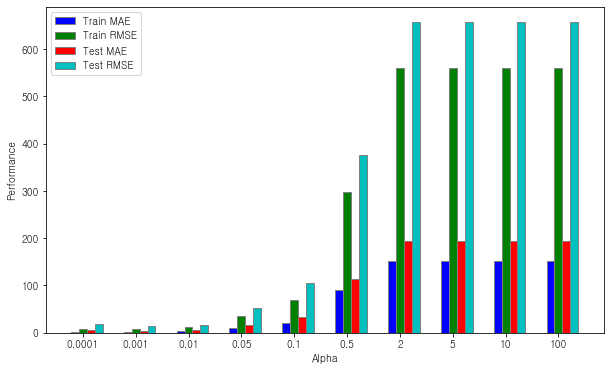

In [82]:
# 성능 지표를 저장할 리스트를 생성합니다.
train_maes = []
train_rmses = []
test_maes = []
test_rmses = []

alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 2, 5, 10, 100]
for alpha in alphas:
    model = Lasso(alpha=alpha) # random_state=1
    model.fit(X_train, y_train)

    # 훈련 데이터에 대한 성능 확인
    train_pred = model.predict(X_train)
    train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()
    y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()
    train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
    train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))

    # 테스트 데이터에 대한 성능 확인
    pred = model.predict(X_test)
    pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()
    y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
    test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
    test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

    # 성능 지표를 리스트에 추가합니다.
    train_maes.append(train_mae)
    train_rmses.append(train_rmse)
    test_maes.append(test_mae)
    test_rmses.append(test_rmse)
    
    print(alpha)
    print("Train MAE: {:.2f}".format(train_mae))
    print("Train RMSE: {:.2f}".format(train_rmse))
    print("Test MAE: {:.2f}".format(test_mae))
    print("Test RMSE: {:.2f}".format(test_rmse), '\n')

    print(r2_score(y_test, pred))

# 성능 지표를 그래프로 시각화합니다.
barWidth = 0.15  # 막대 그래프의 너비를 설정합니다.
r1 = np.arange(len(alphas))  # 막대 그래프의 x 좌표를 설정합니다.
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(10, 6))
plt.bar(r1, train_maes, color='b', width=barWidth, edgecolor='grey', label='Train MAE')
plt.bar(r2, train_rmses, color='g', width=barWidth, edgecolor='grey', label='Train RMSE')
plt.bar(r3, test_maes, color='r', width=barWidth, edgecolor='grey', label='Test MAE')
plt.bar(r4, test_rmses, color='c', width=barWidth, edgecolor='grey', label='Test RMSE')

# Add xticks on the middle of the group bars
plt.xlabel('Alpha', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_maes))], alphas)

plt.ylabel('Performance')
plt.legend()
plt.show()


In [83]:
model = Lasso(alpha=0.001) # random_state=1
model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [84]:
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 

# 스케일링된 예측값을 역변환
pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()

# 훈련 데이터에 대한 성능 확인
train_pred = model.predict(X_train)

# 스케일링된 훈련 예측값을 역변환
train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()

# 스케일링된 훈련 타겟값을 역변환
y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()

# 역변환된 값으로 성능 지표 계산
train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))

print("Train MAE: {:.2f}".format(train_mae))
print("Train RMSE: {:.2f}".format(train_rmse))

# 스케일링된 타겟값을 역변환
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# 역변환된 값으로 성능 지표 계산
test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

print("Test MAE: {:.2f}".format(test_mae))
print("Test RMSE: {:.2f}".format(test_rmse), '\n')

r2_score(y_test, pred)

Train MAE: 2.60
Train RMSE: 8.45
Test MAE: 4.74
Test RMSE: 15.04 



0.9994723258570521

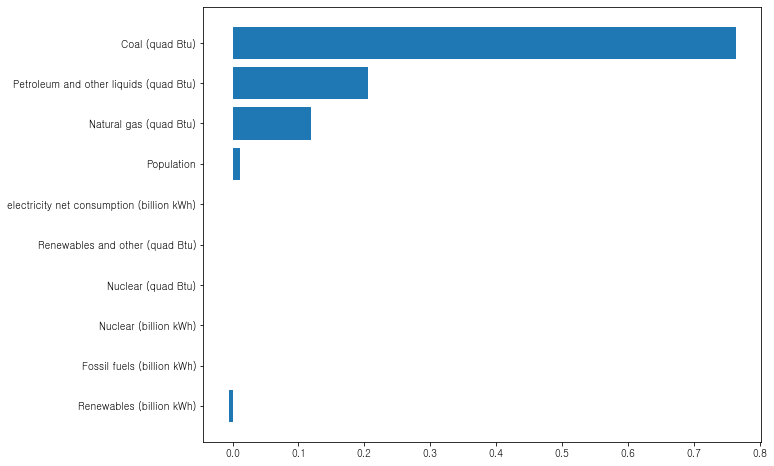

In [85]:
# Feature coefficients, feature 선언
coefficients = model.coef_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

### 4. 엘라스틱넷 회귀 모델 학습

In [86]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터의 범위 설정
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(
    ElasticNet(), 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error'
)

# 최적의 하이퍼파라미터 찾기
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print('Best parameters: ', grid_search.best_params_)

# 최적의 모델 생성
model = grid_search.best_estimator_


Best parameters:  {'alpha': 0.001, 'l1_ratio': 0.7}


### 4. 엘라스틱넷  회귀 모델 검증

0.0001
Train MAE: 2.28
Train RMSE: 7.34
Test MAE: 6.02
Test RMSE: 24.15 

0.9986391334610094
0.001
Train MAE: 2.56
Train RMSE: 8.30
Test MAE: 4.70
Test RMSE: 15.19 

0.9994617714001709
0.01
Train MAE: 3.63
Train RMSE: 13.18
Test MAE: 4.98
Test RMSE: 16.85 

0.9993374375362609
0.05
Train MAE: 8.59
Train RMSE: 36.33
Test MAE: 9.52
Test RMSE: 28.32 

0.9981283327210191
0.1
Train MAE: 13.62
Train RMSE: 58.26
Test MAE: 15.39
Test RMSE: 40.73 

0.9961277870324104
0.5
Train MAE: 49.96
Train RMSE: 187.44
Test MAE: 60.28
Test RMSE: 182.40 

0.9223458075563136
2
Train MAE: 152.17
Train RMSE: 560.53
Test MAE: 193.51
Test RMSE: 657.08 

-0.0077916226588770066
5
Train MAE: 152.17
Train RMSE: 560.53
Test MAE: 193.51
Test RMSE: 657.08 

-0.0077916226588770066
10
Train MAE: 152.17
Train RMSE: 560.53
Test MAE: 193.51
Test RMSE: 657.08 

-0.0077916226588770066
100
Train MAE: 152.17
Train RMSE: 560.53
Test MAE: 193.51
Test RMSE: 657.08 

-0.0077916226588770066


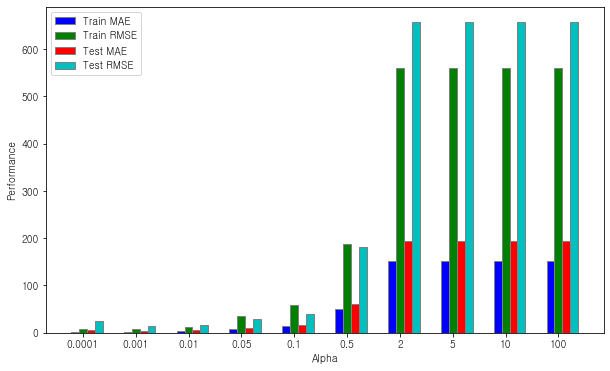

In [87]:
# 성능 지표를 저장할 리스트를 생성합니다.
train_maes = []
train_rmses = []
test_maes = []
test_rmses = []

alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 2, 5, 10, 100]
for alpha in alphas:
    model = ElasticNet(alpha=alpha) # random_state=1
    model.fit(X_train, y_train)

    # 훈련 데이터에 대한 성능 확인
    train_pred = model.predict(X_train)
    train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()
    y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()
    train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
    train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))

    # 테스트 데이터에 대한 성능 확인
    pred = model.predict(X_test)
    pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()
    y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
    test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
    test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

    # 성능 지표를 리스트에 추가합니다.
    train_maes.append(train_mae)
    train_rmses.append(train_rmse)
    test_maes.append(test_mae)
    test_rmses.append(test_rmse)

    print(alpha)
    print("Train MAE: {:.2f}".format(train_mae))
    print("Train RMSE: {:.2f}".format(train_rmse))
    print("Test MAE: {:.2f}".format(test_mae))
    print("Test RMSE: {:.2f}".format(test_rmse), '\n')

    print(r2_score(y_test, pred))

# 성능 지표를 그래프로 시각화합니다.
barWidth = 0.15  # 막대 그래프의 너비를 설정합니다.
r1 = np.arange(len(alphas))  # 막대 그래프의 x 좌표를 설정합니다.
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(10, 6))
plt.bar(r1, train_maes, color='b', width=barWidth, edgecolor='grey', label='Train MAE')
plt.bar(r2, train_rmses, color='g', width=barWidth, edgecolor='grey', label='Train RMSE')
plt.bar(r3, test_maes, color='r', width=barWidth, edgecolor='grey', label='Test MAE')
plt.bar(r4, test_rmses, color='c', width=barWidth, edgecolor='grey', label='Test RMSE')

# Add xticks on the middle of the group bars
plt.xlabel('Alpha', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_maes))], alphas)

plt.ylabel('Performance')
plt.legend()
plt.show()


In [88]:
model = ElasticNet(alpha=0.001) # l1_ratio: 0.7, random_state=1
model.fit(X_train, y_train)

ElasticNet(alpha=0.001)

In [89]:
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 

# 스케일링된 예측값을 역변환
pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()

# 훈련 데이터에 대한 성능 확인
train_pred = model.predict(X_train)

# 스케일링된 훈련 예측값을 역변환
train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()

# 스케일링된 훈련 타겟값을 역변환
y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()

# 역변환된 값으로 성능 지표 계산
train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))

print("Train MAE: {:.2f}".format(train_mae))
print("Train RMSE: {:.2f}".format(train_rmse))

# 스케일링된 타겟값을 역변환
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# 역변환된 값으로 성능 지표 계산
test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

print("Test MAE: {:.2f}".format(test_mae))
print("Test RMSE: {:.2f}".format(test_rmse), '\n')

r2_score(y_test, pred)

Train MAE: 2.56
Train RMSE: 8.30
Test MAE: 4.70
Test RMSE: 15.19 



0.9994617714001709

### 4. 엘라스틱넷 회귀 중요변수 확인


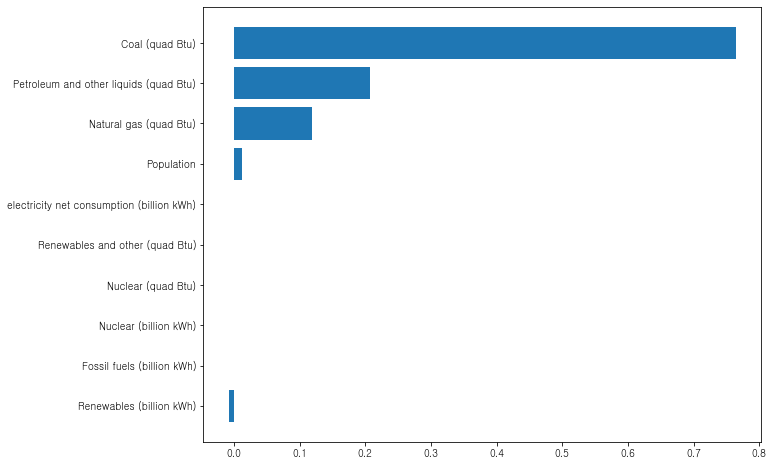

In [90]:
# Feature coefficients, feature 선언
coefficients = model.coef_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

### 5. 로버스트 회귀

In [91]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import HuberRegressor

# # 하이퍼파라미터의 범위 설정
# param_grid = {
#     'epsilon': [0.1, 0.3, 0.5, 0.7, 0.8, 1.0, 1.35, 1.5],
#     'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
#     'max_iter': [50, 100, 150, 200]
# }

# # GridSearchCV 객체 생성
# grid_search = GridSearchCV(
#     HuberRegressor(), 
#     param_grid, 
#     cv=5, 
#     scoring='neg_mean_squared_error'
# )

# # 최적의 하이퍼파라미터 찾기
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print('Best parameters: ', grid_search.best_params_)

# # 최적의 모델 생성
# model = grid_search.best_estimator_


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.0001
Train MAE: 2.03
Train RMSE: 7.87
Test MAE: 5.94
Test RMSE: 25.87 

0.9984379123413416
0.001
Train MAE: 2.03
Train RMSE: 7.85
Test MAE: 5.99
Test RMSE: 26.33 

0.9983816094395388


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.01
Train MAE: 2.03
Train RMSE: 7.89
Test MAE: 5.92
Test RMSE: 25.77 

0.9984503332547942
0.05
Train MAE: 2.04
Train RMSE: 7.81
Test MAE: 6.03
Test RMSE: 26.37 

0.9983770956465172


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.1
Train MAE: 2.04
Train RMSE: 7.87
Test MAE: 5.94
Test RMSE: 25.82 

0.998443503778896
0.5
Train MAE: 2.03
Train RMSE: 7.89
Test MAE: 5.90
Test RMSE: 25.57 

0.9984732939180908


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


2
Train MAE: 2.03
Train RMSE: 7.87
Test MAE: 5.95
Test RMSE: 25.95 

0.9984278646670876
5
Train MAE: 2.03
Train RMSE: 7.86
Test MAE: 5.94
Test RMSE: 25.84 

0.9984408831595387


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10
Train MAE: 2.04
Train RMSE: 7.85
Test MAE: 6.02
Test RMSE: 26.41 

0.99837197517193
100
Train MAE: 2.08
Train RMSE: 7.79
Test MAE: 5.55
Test RMSE: 23.20 

0.9987441375007887


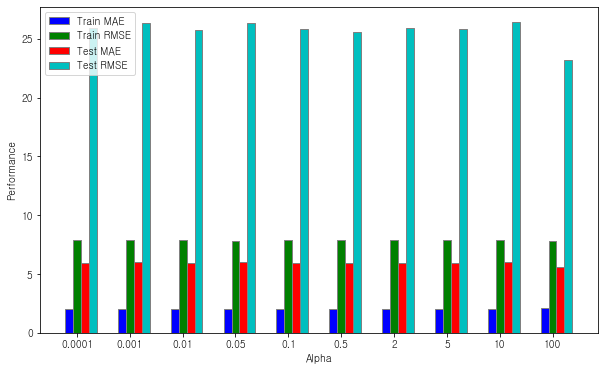

In [92]:
from sklearn.linear_model import HuberRegressor

# 성능 지표를 저장할 리스트를 생성합니다.
train_maes = []
train_rmses = []
test_maes = []
test_rmses = []

alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 2, 5, 10, 100]
for alpha in alphas:
    model = HuberRegressor(alpha=alpha) # random_state=1
    model.fit(X_train, y_train)

    # 훈련 데이터에 대한 성능 확인
    train_pred = model.predict(X_train)
    train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()
    y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()
    train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
    train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))

    # 테스트 데이터에 대한 성능 확인
    pred = model.predict(X_test)
    pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()
    y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
    test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
    test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

    # 성능 지표를 리스트에 추가합니다.
    train_maes.append(train_mae)
    train_rmses.append(train_rmse)
    test_maes.append(test_mae)
    test_rmses.append(test_rmse)
    print(alpha)
    print("Train MAE: {:.2f}".format(train_mae))
    print("Train RMSE: {:.2f}".format(train_rmse))
    print("Test MAE: {:.2f}".format(test_mae))
    print("Test RMSE: {:.2f}".format(test_rmse), '\n')

    print(r2_score(y_test, pred))
# 성능 지표를 그래프로 시각화합니다.
barWidth = 0.15  # 막대 그래프의 너비를 설정합니다.
r1 = np.arange(len(alphas))  # 막대 그래프의 x 좌표를 설정합니다.
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(10, 6))
plt.bar(r1, train_maes, color='b', width=barWidth, edgecolor='grey', label='Train MAE')
plt.bar(r2, train_rmses, color='g', width=barWidth, edgecolor='grey', label='Train RMSE')
plt.bar(r3, test_maes, color='r', width=barWidth, edgecolor='grey', label='Test MAE')
plt.bar(r4, test_rmses, color='c', width=barWidth, edgecolor='grey', label='Test RMSE')

# Add xticks on the middle of the group bars
plt.xlabel('Alpha', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_maes))], alphas)

plt.ylabel('Performance')
plt.legend()
plt.show()


In [93]:
model = HuberRegressor(alpha=2) # l1_ratio: 0.7, random_state=1
model.fit(X_train, y_train)

C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor(alpha=2)

In [94]:
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 

# 스케일링된 예측값을 역변환
pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()

# 훈련 데이터에 대한 성능 확인
train_pred = model.predict(X_train)

# 스케일링된 훈련 예측값을 역변환
train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()

# 스케일링된 훈련 타겟값을 역변환
y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()

# 역변환된 값으로 성능 지표 계산
train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))

print("Train MAE: {:.2f}".format(train_mae))
print("Train RMSE: {:.2f}".format(train_rmse))

# 스케일링된 타겟값을 역변환
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# 역변환된 값으로 성능 지표 계산
test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

print("Test MAE: {:.2f}".format(test_mae))
print("Test RMSE: {:.2f}".format(test_rmse), '\n')

r2_score(y_test, pred)

Train MAE: 2.03
Train RMSE: 7.87
Test MAE: 5.95
Test RMSE: 25.95 



0.9984278646670876

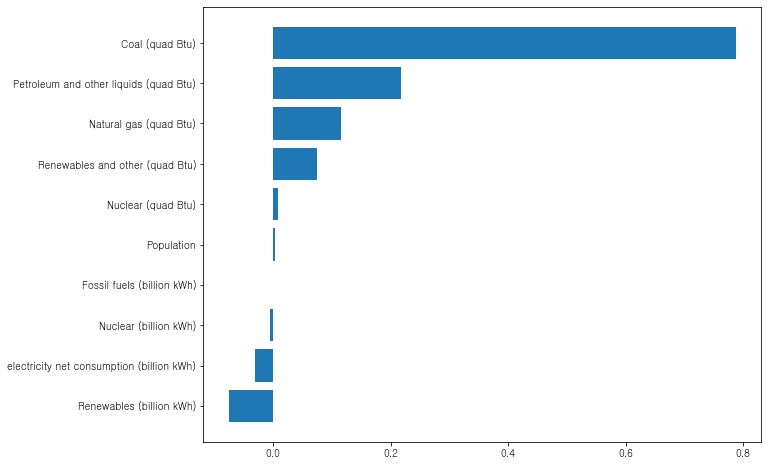

In [95]:
# Feature coefficients, feature 선언
coefficients = model.coef_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

### 1. (비선형) 결정 트리 회귀 모델 학습

In [96]:
model = DecisionTreeRegressor(random_state=3)
model.fit(X_train, y_train) # 모델 학습

DecisionTreeRegressor(random_state=3)

### 1. (비선형) 결정 트리 회귀 모델 검증

In [97]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)

MAE: 131.88%
RMSE: 867.30%


0.41390322686420844

### 1. (비선형) 결정 트리 회귀 중요변수 확인

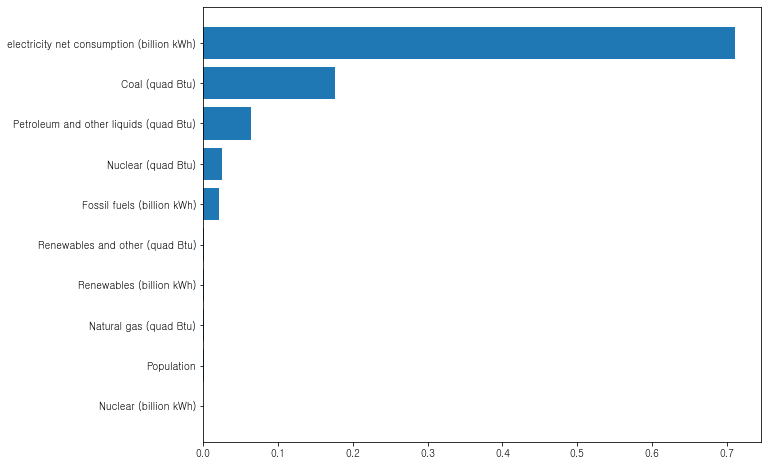

In [98]:
# Feature coefficients, feature 선언
coefficients = model.feature_importances_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

### 2. (비선형) 랜덤포레스트 회귀 모델 학습

In [99]:
model = RandomForestRegressor(n_estimators=100, random_state=4) 
model.fit(X_train, y_train) # 모델 학습

RandomForestRegressor(random_state=4)

### 2. (비선형) 랜덤포레스트 회귀 모델 검증

In [100]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)

MAE: 84.88%
RMSE: 499.69%


0.805448327392088

### 2. (비선형) 랜덤포레스트 회귀 중요변수 확인

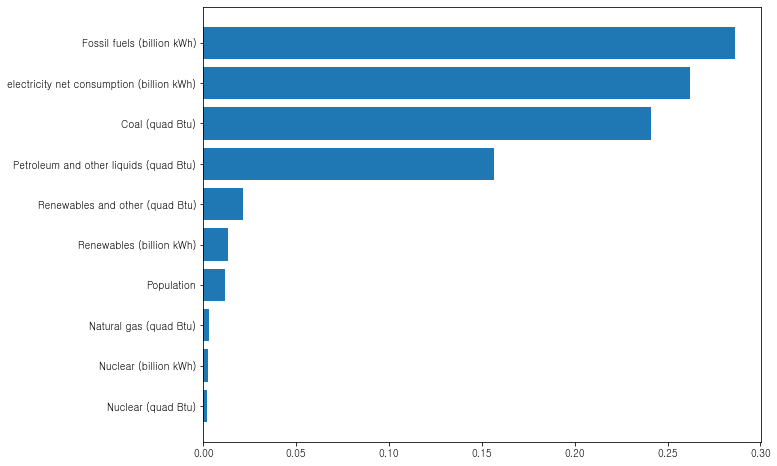

In [101]:
# Feature coefficients, feature 선언
coefficients = model.feature_importances_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

### 3. (비선형) XGBoost 회귀 모델 학습

In [102]:
model = XGBRegressor() 
model.fit(X_train, y_train) # 모델 학습

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### 3. (비선형) XGBoost 회귀 모델 검증

In [103]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)

MAE: 56.34%
RMSE: 289.54%


0.9346793156966853

### 3. (비선형) XGBoost 회귀 중요변수 확인

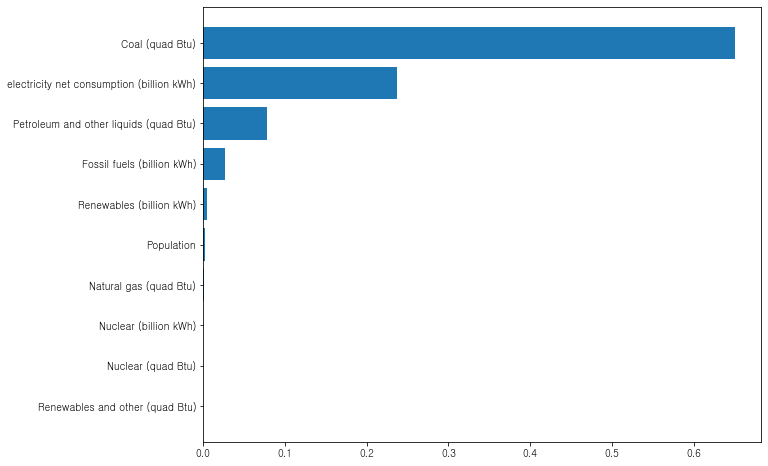

In [104]:
# Feature coefficients, feature 선언
coefficients = model.feature_importances_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

### 4. (비선형) LightGBM 회귀 모델 학습

In [105]:
'''
   LightGBM에서는 특수 문자나 공백이 포함된 변수명을 지원하지 않습니다.
   따라서 'X_train'에서 특수 문자나 공백을 제거하거나, 변수명을 변경해야 합니다.
'''
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
model = LGBMRegressor() 
model.fit(X_train, y_train) # 모델 학습

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### 4. (비선형) LightGBM 회귀 모델 검증

In [ ]:
'''
   LightGBM에서는 특수 문자나 공백이 포함된 변수명을 지원하지 않습니다.
   따라서 'X_train'에서 특수 문자나 공백을 제거하거나, 변수명을 변경해야 합니다.
'''
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
model = LGBMRegressor()
model.fit(X_train, y_train) # 모델 학습

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)

MAE: 51.63%
RMSE: 388.59%


0.5929934263149199

### 4. (비선형) LightGBM 회귀 중요변수 확인

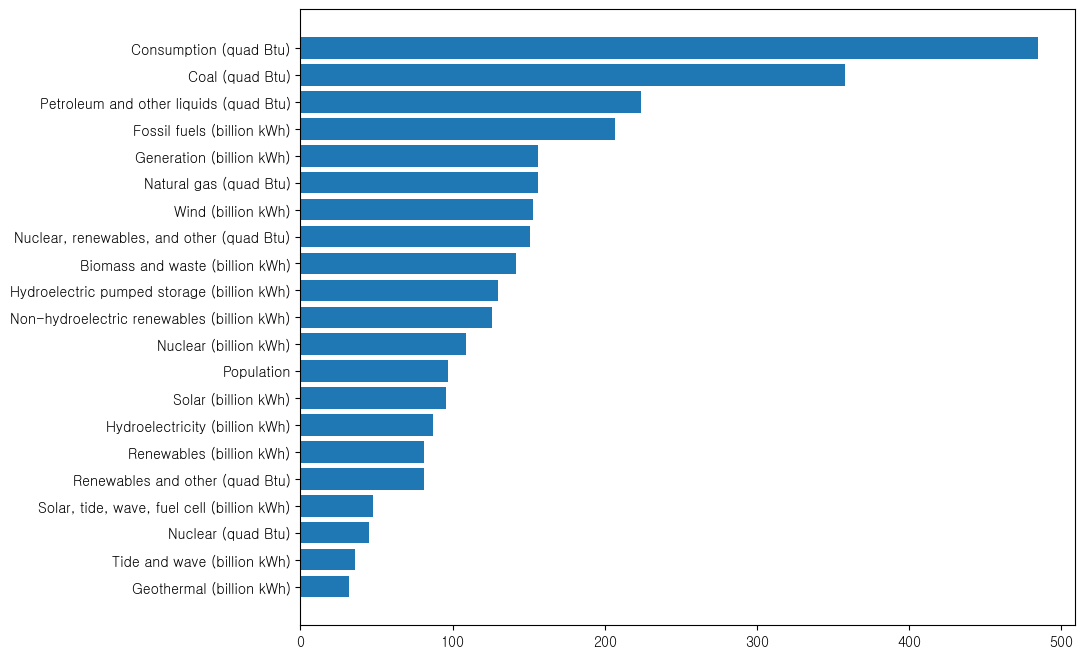

In [ ]:
# Feature coefficients, feature 선언
coefficients = model.feature_importances_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()